In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_df = pd.read_csv('iris.csv')

In [4]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 1. Cleaning data

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Renaming columns name
iris = iris_df.rename(columns={'SepalLengthCm':'Sepal_length',
                           'SepalWidthCm':'Sepal_width',
                           'PetalLengthCm':'Petal_length',
                           'PetalWidthCm':'Petal_width'})

In [7]:
#checck null values
iris.isnull().sum()

Id              0
Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

no null values.

In [8]:
#check if data is biased or not.
iris ['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
#unique species in iris dataset.
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
iris.sample(5)

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
138,139,6.0,3.0,4.8,1.8,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
123,124,6.3,2.7,4.9,1.8,Iris-virginica


In [12]:
#change categorical data into numerical value.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
    
iris["Species"] = le.fit_transform(iris["Species"])
iris.head()

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
iris.tail()

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


## 2.EDA


<Figure size 100x100 with 0 Axes>

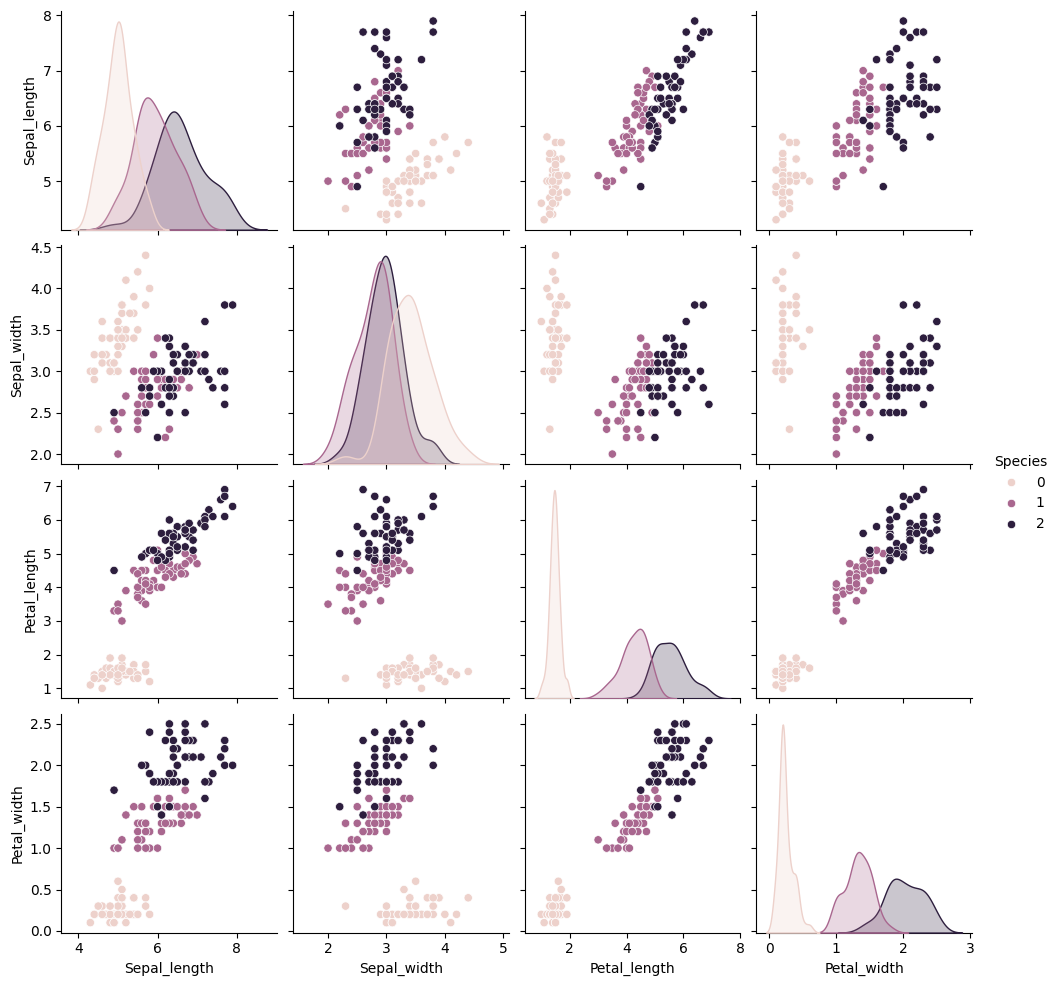

In [14]:
#using pairplot
plt.figure(figsize=(1,1))
sns.pairplot(iris[['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']], hue="Species",diag_kind='kde')

<Figure size 400x500 with 0 Axes>

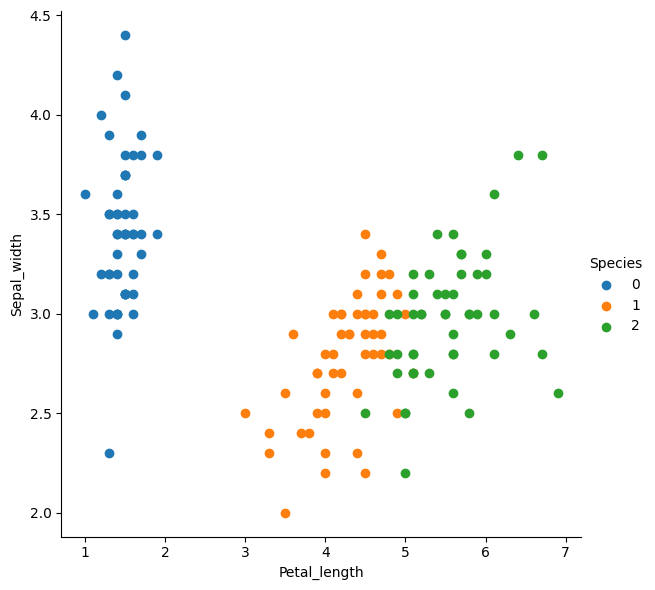

In [15]:
#using scatterplot.
plt.figure(figsize=(4,5))
sns.FacetGrid(iris, hue="Species",height=6).map(plt.scatter,"Petal_length","Sepal_width").add_legend()

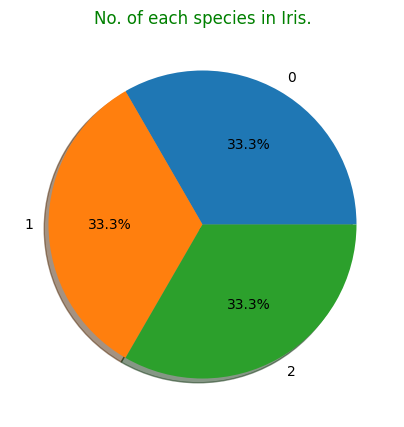

In [16]:
#check value counts
iris["Species"].value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True,figsize=(5,5))
plt.title("No. of each species in Iris.",fontsize = 12 , c = "g")
plt.ylabel("",fontsize=15,c="r")
plt.show()

In [19]:
#correlation in the dataset.
iris.corr()

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
Sepal_length,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal_width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal_length,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal_width,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


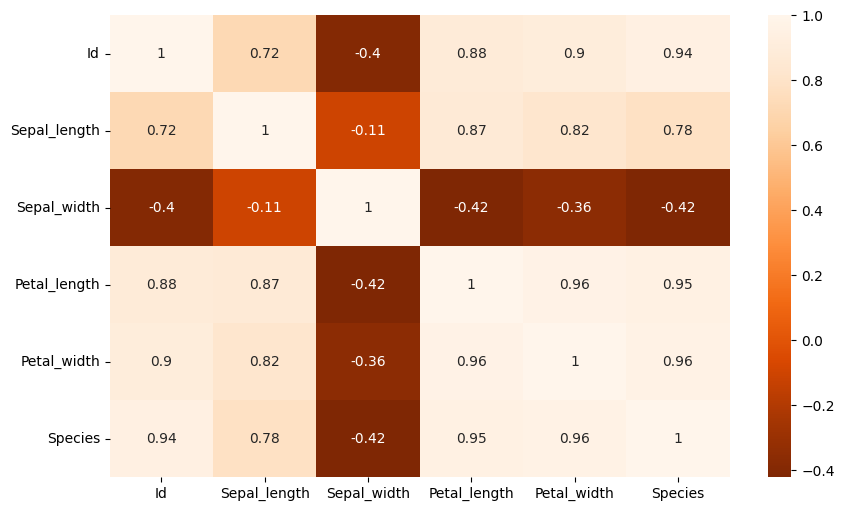

In [20]:
#using heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(iris.corr(),annot = True, cmap = "Oranges_r")
plt.show()

### 3. Train and Test dataset

In [22]:
# Separate features and target
X = iris.iloc[:,[0,1,2,3]]
X.head()

Y= iris.iloc[:, -1]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [23]:
Y.shape

(150,)

In [24]:
# splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


#### 4. Model Building

SVM Algorithm

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
svc=SVC()
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

#confusion matrix.
cm = confusion_matrix(y_test , y_pred)
print("confusion matrix :")
print(cm)

#accurcy.
acc = accuracy_score(y_test,y_pred)
print("accuracy :", acc*100)

confusion matrix :
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy : 100.0


Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

#comfusion matrix.
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

#accuracy test
acc = accuracy_score(y_test, y_pred)
print("accuracy is:", acc*100)

confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is: 100.0


 Random Forest Classifier.

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

#confusion matrix.
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

#accuracy test.
acc = accuracy_score(y_test,y_pred)
print("accuracy is:", acc*100)
 

confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is: 100.0


Decision Tree.

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

#confusion matrix.
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

#accuracy test.
acc = accuracy_score(y_test, y_pred)
print("accuracy", acc*100)

confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy 96.66666666666667


### Test Model

In [31]:
input_data = (4.9,3.0,1.4,0.2)

#change into numpy array
input_data_arr = np.asarray(input_data)

#reshape the data as we are predicting the label for only the instance.
input_data_reshape = input_data_arr.reshape(1,-1)

prediction = dt.predict(input_data_reshape)
print("The category is:", prediction)

The category is: [0]
